In [1]:
import os
os.chdir('/content/drive/MyDrive/DLProject/Nghia')

In [2]:
from tensorflow.keras.backend import image_data_format
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [5]:
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3300, 350, 350, 3)
(3300,)
(2200, 350, 350, 3)
(2200,)


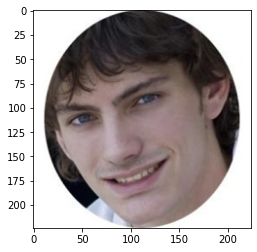

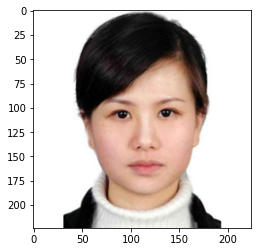

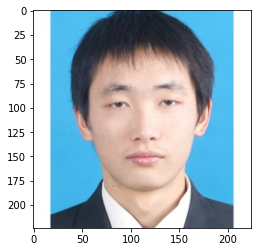

(224, 224, 3)


In [37]:
from PIL import Image
def resize(x):
  img = Image.fromarray(x)
  img = img.resize((224,224))
  return np.array(img)


In [38]:
x_train_resize = []
x_test_resize = []
for x in x_train:
  x_train_resize.append(resize(x))
for x in x_test:
  x_test_resize.append(resize(x))

In [39]:
x_train2 = np.array(x_train_resize)
x_train2.shape

(3300, 224, 224, 3)

In [40]:
x_test2 = np.array(x_test_resize)
x_test2.shape

(2200, 224, 224, 3)

In [41]:
np.save('x_train_resize', x_train2)
np.save('x_test_resize', x_test2)

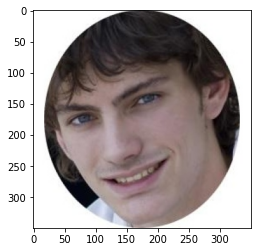

3.516667


In [8]:
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [25]:
model = ResNet50()
img = x_train[0]
img = img[np.newaxis,:,:,:]
x = preprocess_input(img)
pred = model.predict(x)
print('Predicted:', decode_predictions(pred, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n03314780', 'face_powder', 0.06081012), ('n04447861', 'toilet_seat', 0.059593692), ('n04325704', 'stole', 0.045374446)]
